IMPORT LIBRARY + LOAD DATA + CEK DATASET

In [ ]:
# ============================================
# IMPORT LIBRARY YANG DIGUNAKAN
# ============================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pengaturan visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,6)

# ============================================
# LOAD DATASET
# ============================================

df = pd.read_csv('/content/spotify_clean_for_kmeans (1).csv')

# Menampilkan data awal
df.head(10)

# ============================================
# CEK STRUKTUR DATASET
# ============================================

print("Ukuran dataset (baris, kolom):")
print(df.shape)

print("\nInformasi dataset:")
df.info()

Ukuran dataset (baris, kolom):
(2500, 11)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist and Title  2500 non-null   object 
 1   Streams           2500 non-null   object 
 2   Daily             2497 non-null   object 
 3   Streams_num       2500 non-null   float64
 4   Daily_num         2500 non-null   float64
 5   Artist            2500 non-null   object 
 6   Title             2500 non-null   object 
 7   Daily_missing     2500 non-null   int64  
 8   log_streams       2500 non-null   float64
 9   log_daily         2500 non-null   float64
 10  daily_to_streams  2500 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 215.0+ KB


ANALISIS DESKRIPTIF + KUALITAS DATA

In [ ]:
# ============================================
# STATISTIK DESKRIPTIF DATA
# ============================================

df.describe()

# ============================================
# CEK NILAI KOSONG (MISSING VALUE)
# ============================================

print("\nJumlah missing value tiap kolom:")
df.isnull().sum()



Jumlah missing value tiap kolom:


,0
Artist and Title,0
Streams,0
Daily,3
Streams_num,0
Daily_num,0
Artist,0
Title,0
Daily_missing,0
log_streams,0
log_daily,0


SELEKSI DATA NUMERIK + VISUALISASI DISTRIBUSI

Kolom numerik yang digunakan:
Index(['Streams_num', 'Daily_num', 'Daily_missing', 'log_streams', 'log_daily',
       'daily_to_streams'],
      dtype='object')


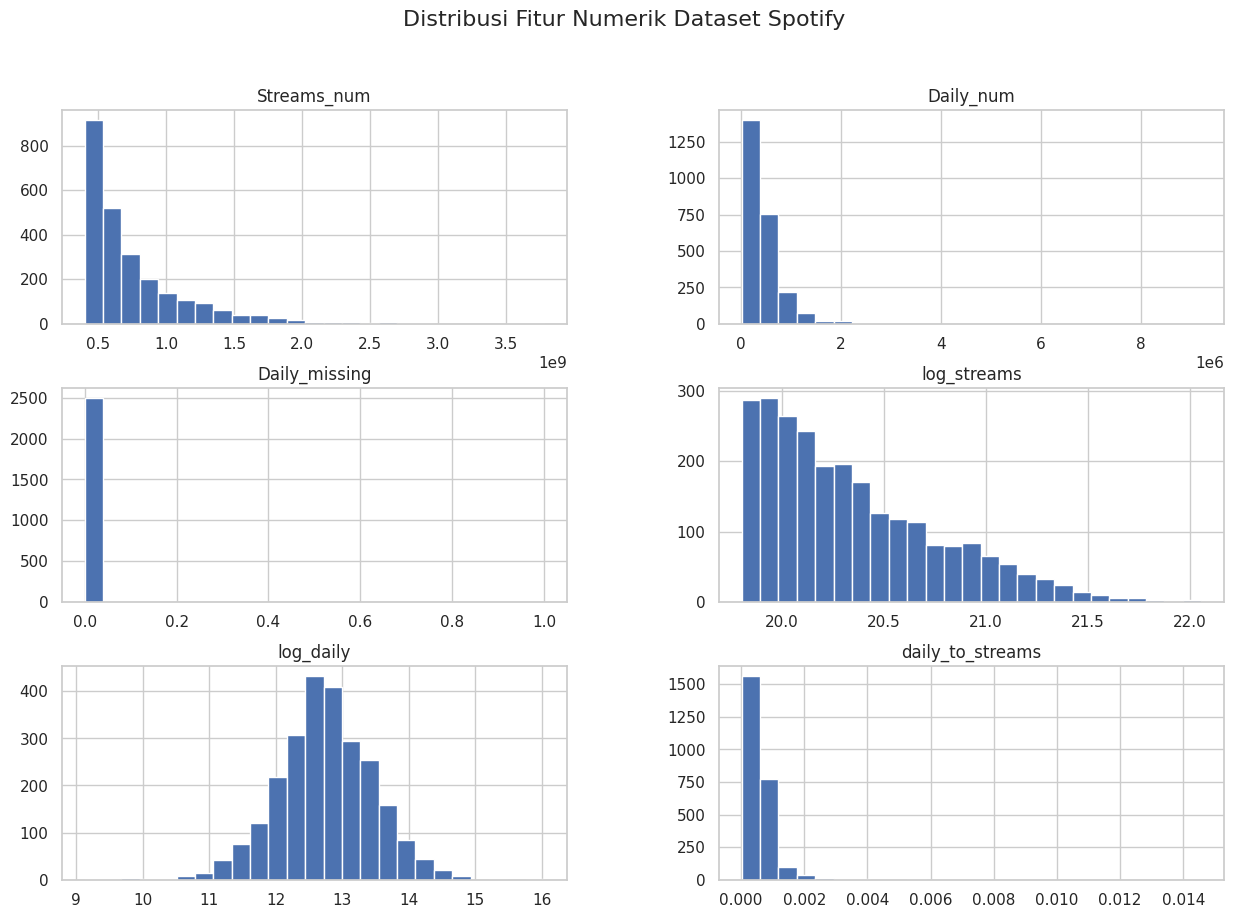

In [ ]:
# ============================================
# SELEKSI FITUR NUMERIK
# ============================================

df_numeric = df.select_dtypes(include=['int64', 'float64'])

print("Kolom numerik yang digunakan:")
print(df_numeric.columns)

# ============================================
# VISUALISASI DISTRIBUSI DATA
# ============================================

df_numeric.hist(bins=25, figsize=(15,10))
plt.suptitle("Distribusi Fitur Numerik Dataset Spotify", fontsize=16)
plt.show()


NORMALISASI + ELBOW METHOD

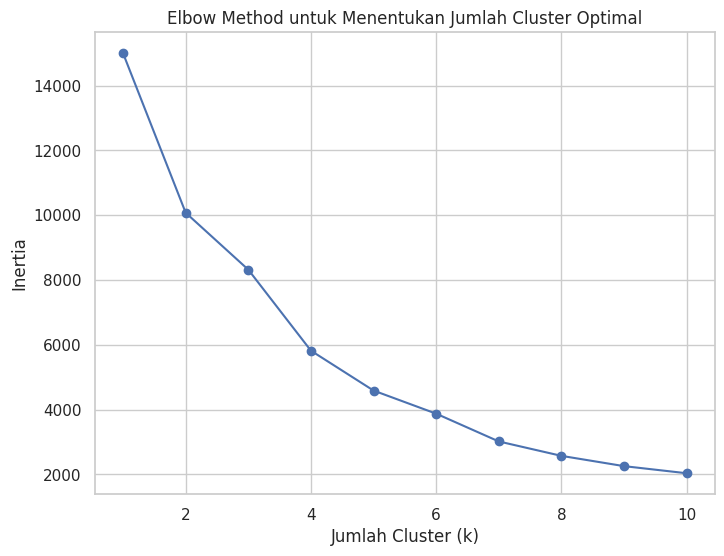

In [ ]:
# ============================================
# STANDARDISASI DATA
# ============================================

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)

scaled_df.head()

# ============================================
# ELBOW METHOD UNTUK MENENTUKAN CLUSTER
# ============================================

inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()


K-MEANS + ANALISIS + VISUALISASI

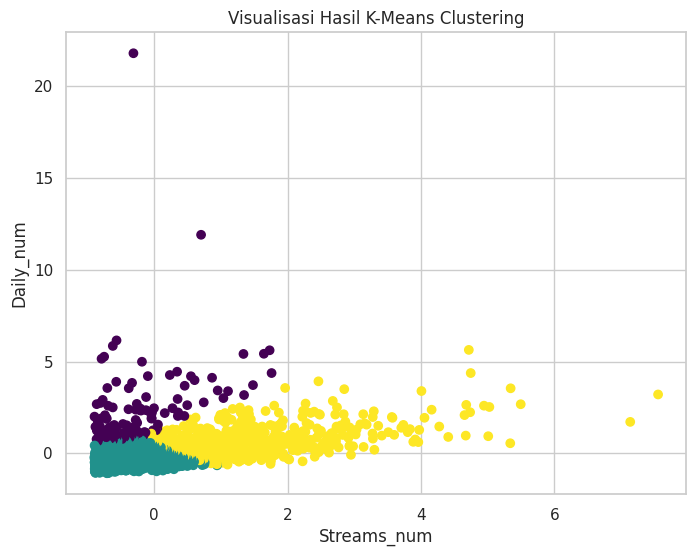

File hasil_kmeans_spotify.csv berhasil disimpan


In [ ]:
# ============================================
# PEMODELAN K-MEANS CLUSTERING
# ============================================

# Berdasarkan Elbow Method, digunakan k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Menambahkan hasil cluster ke dataset asli
df['Cluster'] = cluster_labels

df.head(10)

# ============================================
# ANALISIS KARAKTERISTIK CLUSTER
# ============================================

cluster_summary = df.groupby('Cluster')[df_numeric.columns].mean()
cluster_summary

# ============================================
# VISUALISASI HASIL CLUSTERING
# ============================================

plt.scatter(
    scaled_df.iloc[:, 0],
    scaled_df.iloc[:, 1],
    c=df['Cluster'],
    cmap='viridis'
)

plt.xlabel(scaled_df.columns[0])
plt.ylabel(scaled_df.columns[1])
plt.title('Visualisasi Hasil K-Means Clustering')
plt.show()

# ============================================
# SIMPAN HASIL CLUSTERING
# ============================================

df.to_csv('hasil_kmeans_spotify.csv', index=False)
print("File hasil_kmeans_spotify.csv berhasil disimpan")

CEK OUTLIER (UNTUK KELIHATAN ANALISIS DALAM)

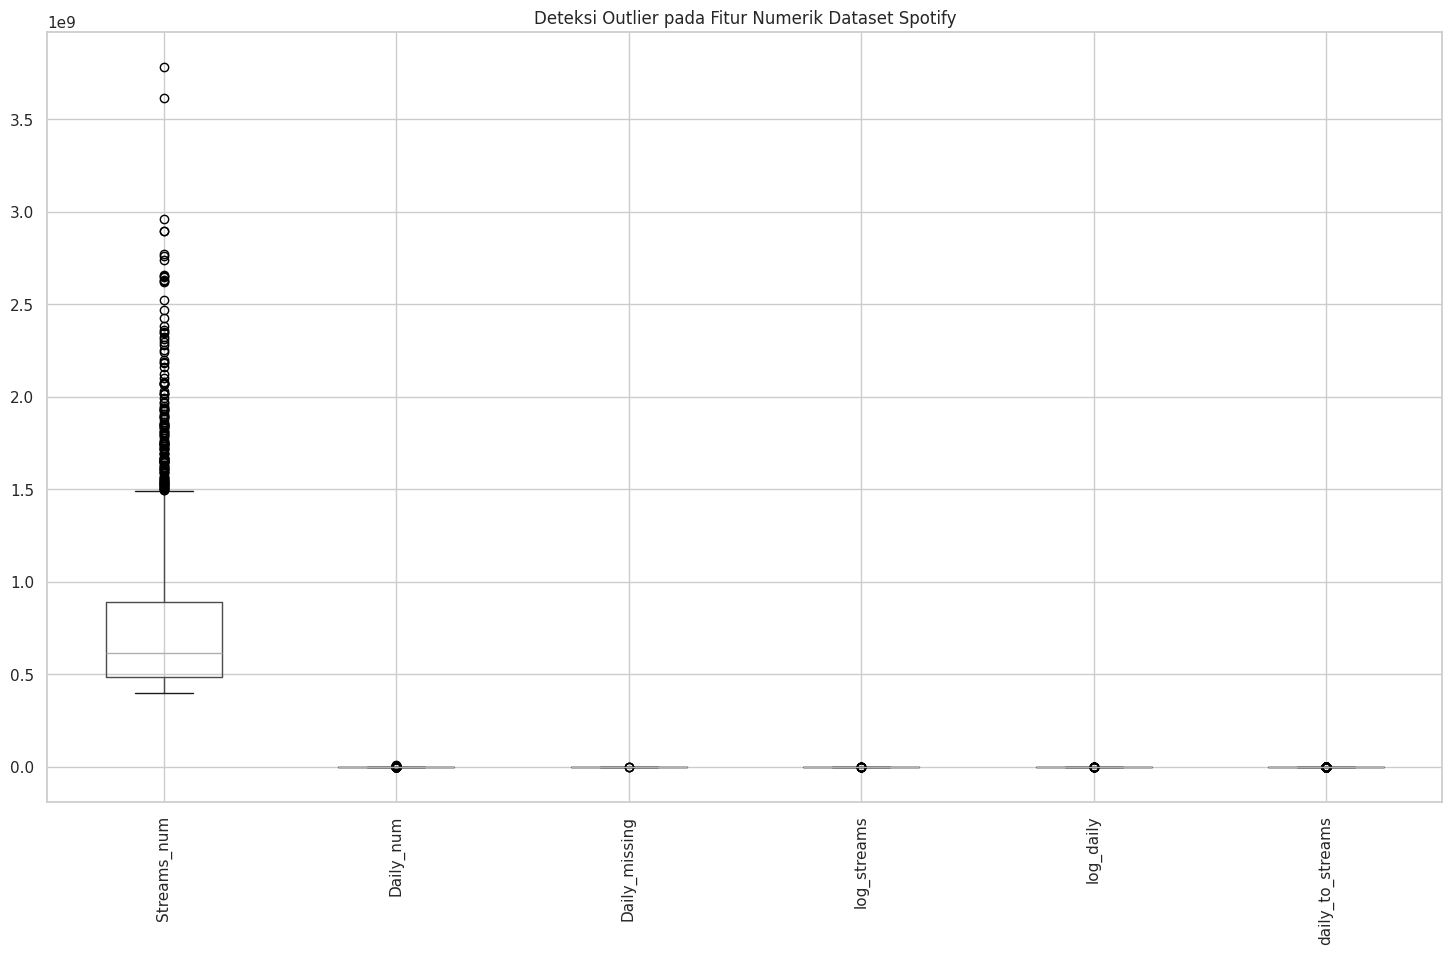

Boxplot digunakan untuk melihat kemungkinan outlier
Outlier tidak dihapus karena K-Means masih dapat mentoleransi


In [ ]:
# =========================================================
# DETEKSI OUTLIER MENGGUNAKAN BOXPLOT
# =========================================================

plt.figure(figsize=(18, 10))
df_numeric.boxplot()
plt.xticks(rotation=90)
plt.title("Deteksi Outlier pada Fitur Numerik Dataset Spotify")
plt.show()

print("Boxplot digunakan untuk melihat kemungkinan outlier")
print("Outlier tidak dihapus karena K-Means masih dapat mentoleransi")


VISUALISASI CLUSTER DENGAN PCA

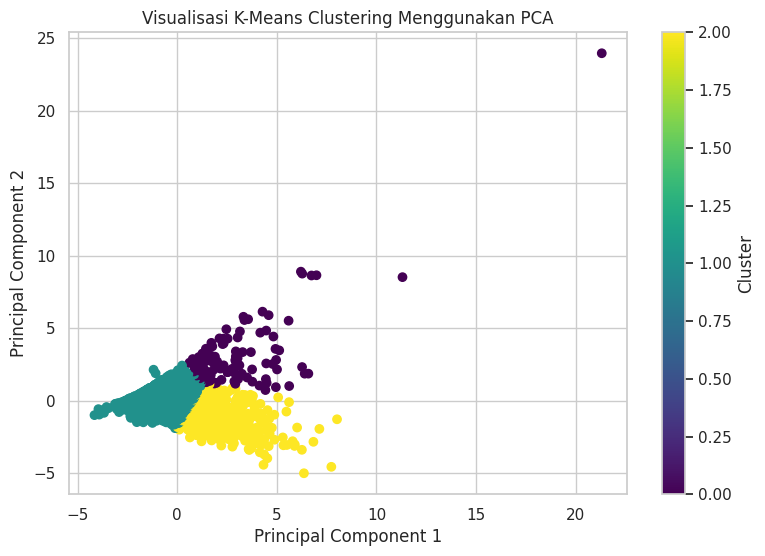

In [ ]:
# =========================================================
# VISUALISASI CLUSTER MENGGUNAKAN PCA
# =========================================================

from sklearn.decomposition import PCA

# Lakukan PCA untuk mengurangi dimensi menjadi 2 komponen
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_df)

# Buat DataFrame untuk hasil PCA
pca_df = pd.DataFrame(data = pca_data, columns = ['PCA1', 'PCA2'])

plt.figure(figsize=(9,6))
plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=df['Cluster'],
    cmap='viridis'
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi K-Means Clustering Menggunakan PCA")
plt.colorbar(label="Cluster")
plt.show()

PERBANDINGAN BEBERAPA JUMLAH

k = 2, Silhouette Score = 0.47314923011927273
k = 3, Silhouette Score = 0.48050591564869166
k = 4, Silhouette Score = 0.49652178931671087
k = 5, Silhouette Score = 0.35623895192713806
k = 6, Silhouette Score = 0.35809060338013465
k = 7, Silhouette Score = 0.34902856623154094


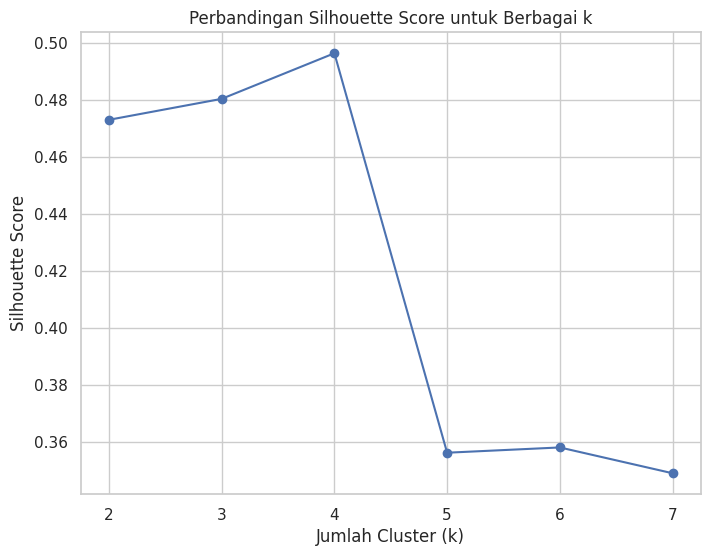

In [ ]:
# =========================================================
# PERBANDINGAN SILHOUETTE SCORE UNTUK BEBERAPA K
# =========================================================

from sklearn.metrics import silhouette_score

silhouette_scores = []

range_k = range(2, 8)

for k in range_k:
    kmeans_temp = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans_temp.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score}")

# Visualisasi
plt.plot(range_k, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score untuk Berbagai k")
plt.show()


INTERPRETASI OTOMATIS

In [ ]:
# =========================================================
# INTERPRETASI OTOMATIS CLUSTER
# =========================================================

print("INTERPRETASI UMUM CLUSTER:\n")

for i in range(jumlah_cluster):
    print(f"Cluster {i}:")
    print("Merupakan kelompok lagu dengan karakteristik rata-rata")
    print(cluster_summary.loc[i])
    print("-" * 60)


INTERPRETASI UMUM CLUSTER:

Cluster 0:
Merupakan kelompok lagu dengan karakteristik rata-rata
Streams_num         6.651326e+08
Daily_num           1.403703e+06
Daily_missing       0.000000e+00
log_streams         2.025903e+01
log_daily           1.403595e+01
daily_to_streams    2.200421e-03
Name: 0, dtype: float64
------------------------------------------------------------
Cluster 1:
Merupakan kelompok lagu dengan karakteristik rata-rata
Streams_num         5.744802e+08
Daily_num           2.892893e+05
Daily_missing       1.689189e-03
log_streams         2.014145e+01
log_daily           1.244109e+01
daily_to_streams    5.165802e-04
Name: 1, dtype: float64
------------------------------------------------------------
Cluster 2:
Merupakan kelompok lagu dengan karakteristik rata-rata
Streams_num         1.311887e+09
Daily_num           7.175193e+05
Daily_missing       0.000000e+00
log_streams         2.094910e+01
log_daily           1.339551e+01
daily_to_streams    5.697424e-04
Name: 2, d

VALIDASI KUALITAS MODEL

In [ ]:
# =========================================================
# VALIDASI KUALITAS MODEL CLUSTERING
# =========================================================

final_silhouette = silhouette_score(scaled_df, df['Cluster'])

jumlah_cluster = 3 # Define jumlah_cluster based on previous KMeans model

print("====================================")
print("EVALUASI MODEL K-MEANS CLUSTERING")
print("====================================")
print("Jumlah Cluster:", jumlah_cluster)
print("Silhouette Score:", final_silhouette)

if final_silhouette > 0.5:
    print("Kualitas clustering: BAIK")
elif final_silhouette > 0.25:
    print("Kualitas clustering: CUKUP")
else:
    print("Kualitas clustering: KURANG")

EVALUASI MODEL K-MEANS CLUSTERING
Jumlah Cluster: 3
Silhouette Score: 0.4875983939925247
Kualitas clustering: CUKUP
